In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
#import csv
import seaborn as sns

In [84]:
data_fn = '/Users/mattf/Documents/Spr19/448/final/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutliers.counts.matrix.tsv'
data = pd.read_table(data_fn, sep = '\t', header = 0, index_col = 0)
data # genes are rows. samples are columns

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,225.00,252.00,136.00,166.00,207.00,121.00,127.00,304.00,227.00,224.00,...,132.00,149.00,186.00,71.00,272.00,136.00,324.00,158.00,168.00,167.00
ENSG00000000005,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,4.00,0.00,...,0.00,0.00,3.00,1.00,1.00,1.00,1.00,2.00,1.00,0.00
ENSG00000000419,254.00,301.00,173.00,264.00,307.00,140.00,164.00,279.00,216.00,274.00,...,369.00,148.00,265.00,86.00,326.00,283.00,300.00,242.00,286.00,207.00
ENSG00000000457,422.99,510.00,272.00,301.00,417.00,116.00,198.00,278.00,243.00,297.00,...,274.00,163.00,227.00,96.00,418.00,338.00,277.00,342.00,343.00,140.00
ENSG00000000460,272.00,310.00,204.00,224.00,227.00,149.00,253.00,171.00,274.00,198.00,...,280.00,168.00,308.00,86.00,284.00,260.00,179.00,210.00,225.00,124.00
ENSG00000000938,21.00,12.00,21.00,11.00,16.00,34.00,15.00,19.00,17.00,18.00,...,21.00,14.00,9.00,21.00,17.00,11.00,17.00,29.00,10.00,12.00
ENSG00000000971,165.00,178.96,111.49,181.77,244.00,230.67,196.97,264.92,179.72,163.48,...,136.07,199.33,215.67,56.00,299.43,151.80,147.81,174.00,211.66,162.70
ENSG00000001036,107.00,150.00,94.00,78.00,114.00,79.00,58.00,192.00,121.00,155.00,...,65.00,112.00,108.00,33.00,94.00,80.00,115.00,109.00,78.00,94.00
ENSG00000001084,449.00,624.00,219.00,583.00,499.00,354.00,453.00,428.00,345.00,486.00,...,840.00,264.00,681.00,126.00,485.00,361.00,359.00,358.00,422.00,284.00
ENSG00000001167,757.00,872.00,643.00,698.00,627.00,618.00,625.00,520.00,702.00,386.00,...,892.00,460.00,641.00,309.00,540.00,496.00,469.00,526.00,625.00,1050.00


In [85]:
cells = list(data)
metadata = pd.read_csv('./EyeGEx_meta_combined_inferior_retina_summary_deidentified.txt',names=['r_id','sample_id', 'os_od',
'age', 'sex', 'mgs_level' ,'rin', 'postmortem_interval_hrs'], delim_whitespace=True, index_col = 0)
metadata = metadata.iloc[1:,:]
metadata = metadata.filter(items=cells, axis=0)
metadata.columns=['sample_id', 'os_od', 'age', 'sex', 'MGS Level' ,'rin', 'postmortem_interval_hrs']
print(metadata.shape)
print(metadata[metadata['MGS Level']!=str(1)].shape)
print(metadata[metadata['MGS Level']!=str(1)].index)
len(metadata[metadata['MGS Level']!=str(1)].index)
MGSindices = metadata[metadata['MGS Level']!=str(1)].index
print(MGSindices)
noMGSindices = metadata[metadata['MGS Level']==str(1)].index
print(noMGSindices)



(453, 7)
(348, 7)
Index(['100_2', '101_3', '102_2', '103_3', '104_2', '105_2', '106_4', '107_4',
       '11_4', '110_3',
       ...
       '87_2', '90_2', '91_2', '92_3', '93_2', '94_4', '95_4', '96_3', '97_2',
       '98_3'],
      dtype='object', name='r_id', length=348)
Index(['100_2', '101_3', '102_2', '103_3', '104_2', '105_2', '106_4', '107_4',
       '11_4', '110_3',
       ...
       '87_2', '90_2', '91_2', '92_3', '93_2', '94_4', '95_4', '96_3', '97_2',
       '98_3'],
      dtype='object', name='r_id', length=348)
Index(['109_1', '115_1', '117_1', '119_1', '120_1', '126_1', '137_1', '139_1',
       '142_1', '145_1',
       ...
       '503_1', '506_1', '517_1', '518_1', '526_1', '6_1', '81_1', '89_1',
       '9_1', '99_1'],
      dtype='object', name='r_id', length=105)


In [86]:
cells = list(data) # before filtering
#print(cells, len(cells))

data = data[MGSindices]
print(data.shape)

cells = list(data)
#print(cells, len(cells))

contained = data > 6
data = data[contained.sum(axis=1) >= 70] # Note: 91 when non-MGS samples are included
data = np.transpose(data) #????
data = np.log(data + 1)
data = pd.DataFrame(scale(data))
data

(58051, 348)


,0,1,2,3,4,5,6,7,8,9,...,19331,19332,19333,19334,19335,19336,19337,19338,19339,19340
0,0.194859,0.053235,0.581346,0.279480,0.408198,-0.054978,-0.203440,-0.024256,0.454972,1.734850,...,1.631149,0.683792,1.107488,0.193128,0.994811,0.598176,-0.914079,1.555516,0.039744,0.536730
1,0.471956,0.543880,1.043697,0.591619,-0.494390,0.089454,0.585505,0.835810,0.834411,1.050278,...,0.443640,-0.015022,0.845323,0.631741,-0.075991,0.211379,1.725981,0.545877,-0.170460,-0.062242
2,-1.034174,-1.055329,-0.509112,-0.406641,0.408198,-0.751003,-0.505353,-1.897841,0.017154,-0.386196,...,0.254553,0.084360,0.587425,0.584976,0.363892,0.183541,-3.239400,-0.009973,-0.979400,-1.484151
3,-0.547984,0.164803,-0.259049,-0.183675,-0.631714,0.117168,-0.939502,0.658168,0.237298,0.245102,...,0.344816,0.325035,0.457320,-0.410999,0.592616,-1.984271,-0.478646,-1.550616,-0.534208,-0.424133
4,-0.008927,0.600939,0.546102,-0.151951,-0.034144,0.641310,-0.055606,0.251591,-0.050428,0.668318,...,0.728690,-0.590146,0.460383,-0.583606,-1.353889,-0.570751,0.587423,0.652884,0.711036,-0.295264
5,-1.318896,-1.665274,-2.607846,-1.154828,1.204781,0.541243,-0.909891,-0.645092,-0.089204,-0.159786,...,1.837631,0.302877,0.869539,0.671886,-0.080673,0.151030,-1.034774,1.398307,-0.979400,0.284682
6,-1.201017,-1.209370,-1.292249,0.106699,-0.138155,0.260062,-1.626663,-0.001087,-0.058996,-0.682458,...,-0.521591,-1.643113,-0.676087,-2.603128,0.091281,-1.666372,0.078931,-0.199547,-0.671855,-1.886570
7,0.930915,0.324500,-0.455263,-0.827028,0.244680,0.787871,1.163205,-0.149378,-0.552193,-0.371031,...,-1.428410,0.596923,-2.102537,0.362741,0.045583,-1.984271,-1.997332,-0.423765,-0.170460,-0.562925
8,0.183971,0.272238,-0.292076,-0.477790,0.156679,-0.071432,0.662190,0.182619,-1.350884,-0.534463,...,-1.125277,0.415166,-0.844718,-2.110897,-0.837515,-1.984271,-2.256000,-2.403046,0.711036,-0.117736
9,-0.167391,0.600939,0.739804,0.374094,0.328387,0.322477,-0.225338,0.767913,-0.382374,0.826335,...,0.497298,-2.740991,-1.203682,0.196243,-1.124583,0.235626,-0.289199,0.299093,0.137084,0.043871


In [87]:
pca = PCA(n_components=20) # reduce the dimensionality of the GENES
pca_samples = pca.fit_transform(data) # 10 min...
print(pca.explained_variance_ratio_)
print('SUM: ')
print(np.sum(pca.explained_variance_ratio_))
print(pca_samples.shape)

[0.44786125 0.17237062 0.03946962 0.02548917 0.02493054 0.01499425
 0.01231834 0.00923092 0.00878535 0.00767736 0.00667886 0.00520924
 0.00412281 0.0038644  0.00351121 0.00328141 0.00319415 0.00272784
 0.00265087 0.00249609]
SUM: 
0.8008642988560961
(348, 20)


In [88]:
ica = FastICA(n_components = 20, random_state = 3, max_iter = 2000)
ica_samples = ica.fit_transform(data) # 10 min...
print(ica_samples.shape)

(348, 20)


In [89]:
gmm = GaussianMixture(n_components = 4).fit(pca_samples)
gmm_clustered_pca = gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(gmm_clustered_pca)
z = zip(cells, gmm_clustered_pca)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = gmm_clustered_pca
t.to_csv('assignments_gmm_pca.csv')
gmm_clustered_pca

array([3, 1, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 3, 1, 0, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 3, 3, 0, 3, 1,
       3, 3, 3, 0, 1, 3, 1, 2, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 1, 0,
       0, 1, 3, 0, 0, 3, 3, 0, 0, 3, 2, 2, 3, 0, 3, 3, 1, 3, 3, 0, 3, 0,
       0, 1, 1, 1, 2, 0, 3, 1, 0, 0, 3, 3, 1, 2, 3, 2, 1, 3, 3, 3, 0, 3,
       1, 1, 0, 3, 3, 0, 0, 1, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 0, 1, 1, 2,
       2, 2, 3, 1, 3, 0, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 3, 1, 2, 3, 3, 3, 3, 0, 1, 1, 1, 2, 2, 3, 2, 2,
       2, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 3, 0, 2, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 2, 2, 1, 2, 2,

In [90]:
#gmm = GaussianMixture(n_components = 4).fit(data)
#gmm_clustered_noreduction = gmm.predict(data) # kmeans.fit_predict(pca_samples)
#len(gmm_clustered_noreduction)
#z = zip(cells, gmm_clustered_noreduction)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
#t = pd.DataFrame()
#t['sample'] = cells
#t['clusters'] = gmm_clustered_noreduction
#t.to_csv('assignments_gmm_noreduction.csv')
#gmm_clustered_noreduction

In [91]:
gmm = GaussianMixture(n_components = 4).fit(ica_samples)
gmm_clustered_ica = gmm.predict(ica_samples) # kmeans.fit_predict(pca_samples)
len(gmm_clustered_ica)
z = zip(cells, gmm_clustered_ica)
#with open('data_gmm_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = gmm_clustered_ica
t.to_csv('assignments_gmm_ica.csv')
gmm_clustered_ica

array([1, 3, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 2, 3,
       0, 0, 0, 3, 2, 0, 2, 2, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       3, 2, 2, 2, 3, 0, 0, 2, 0, 2, 0, 3, 2, 3, 3, 3, 3, 0, 0, 3, 3, 2,
       3, 2, 1, 3, 0, 0, 3, 2, 0, 0, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 2, 3,
       0, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 0, 2, 0, 3, 0, 3, 0, 3, 2,
       1, 2, 0, 2, 3, 2, 3, 2, 3, 0, 3, 0, 0, 1, 3, 3, 3, 1, 3, 0, 0, 3,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0,
       0, 3, 3, 1, 1, 1, 2, 0, 3, 1, 0, 0, 0, 3, 2, 3, 0, 0, 0, 2, 3, 3,
       3, 1, 0, 3, 3, 2, 2, 3, 3, 3, 0, 0, 3, 3, 2,

In [92]:
gmm.means_

array([[ 0.01656211, -0.00300716,  0.01212508,  0.01077836,  0.01064676,
        -0.00561031,  0.02236684, -0.00538814,  0.00920672, -0.0038817 ,
         0.00113945, -0.00015344,  0.00403545, -0.0133467 ,  0.02435459,
        -0.01399652,  0.00841583,  0.03062506, -0.00718409,  0.00045037],
       [-0.00489865,  0.01327011,  0.06459602, -0.04237657,  0.07638475,
        -0.0551864 , -0.02110821,  0.04566798, -0.02676316, -0.03206725,
        -0.05223272, -0.03522498,  0.01723271, -0.00892889, -0.01192725,
        -0.01592137,  0.00898111, -0.01874812,  0.00054971, -0.01258935],
       [-0.02060024,  0.01783611, -0.01423763,  0.00074934, -0.02787032,
         0.00270065, -0.01704207,  0.00149277, -0.01913115,  0.0214441 ,
        -0.00672906, -0.00367883, -0.0188462 , -0.01490069, -0.01116141,
         0.01131997,  0.00221787, -0.0176409 , -0.01131875,  0.01182971],
       [ 0.00481525, -0.01830548, -0.00926162, -0.00538273,  0.00509814,
         0.01290285, -0.00265368, -0.00359612,  

In [93]:
ap = AffinityPropagation(preference = -600000).fit(pca_samples)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_pca = ap.predict(pca_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_pca)
z = zip(cells, ap_clustered_pca)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_pca
t.to_csv('assignments_ap_pca.csv')
ap_clustered_pca

number clusters 4


array([0, 0, 3, 0, 1, 0, 3, 3, 3, 1, 0, 3, 1, 0, 3, 3, 0, 3, 3, 0, 3, 1,
       0, 1, 3, 1, 0, 3, 0, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 3, 0, 1, 1, 3, 1, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 1, 3, 3,
       0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 3, 3,
       3, 1, 1, 3, 0, 3, 0, 3, 3, 1, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 0, 1,
       1, 3, 0, 0, 3, 3, 3, 3, 0, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 3, 1, 2,
       2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 3, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 2, 0, 2, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 1, 3, 3, 0, 2, 0, 3, 1, 1,
       1, 3, 2, 1, 3, 0, 1, 3, 0, 2, 2, 2, 1, 1, 1,

In [94]:
ap = AffinityPropagation(preference = -10000000000).fit(ica_samples)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_ica = ap.predict(ica_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_ica)
z = zip(cells, ap_clustered_ica)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_ica
t.to_csv('assignments_ap_ica.csv')
ap_clustered_ica

number clusters 348


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [95]:
ap = AffinityPropagation(preference = -400000).fit(data)
print("number clusters", len(ap.cluster_centers_indices_))
ap_clustered_noreduction = ap.predict(data) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(ap_clustered_noreduction)
z = zip(cells, ap_clustered_noreduction)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = ap_clustered_noreduction
t.to_csv('assignments_ap_noreduction.csv')
ap_clustered_noreduction

number clusters 5


array([1, 1, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 1, 1, 0, 4, 4, 4, 4, 4, 0, 2,
       1, 2, 4, 4, 4, 0, 4, 0, 2, 2, 2, 0, 4, 4, 2, 0, 0, 4, 0, 1, 1, 4,
       2, 0, 4, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 1, 4,
       4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 1, 4, 0, 4, 1, 4, 0, 4, 4, 0,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 0, 4, 0,
       4, 2, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 0, 2, 2, 3,
       3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 4, 4,
       4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1, 4,
       4, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 4, 1, 4, 2, 2, 4, 1, 1, 4, 3, 3,
       1, 1, 4, 4, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 1, 3, 3,
       3, 2, 3, 3, 4, 3, 2, 2, 2, 4, 1, 2, 4, 3, 3, 1, 2, 4, 1, 1, 4, 4,
       4, 1, 4, 4, 3, 4, 4, 3, 4, 4, 1, 4, 1, 2, 4, 2, 1, 3, 4, 4, 2, 2,
       2, 4, 3, 4, 2, 4, 2, 2, 1, 3, 3, 3, 2, 2, 2,

In [96]:
kmeans = KMeans(n_clusters = 4).fit(ica_samples)
kmeans_ica = kmeans.predict(ica_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_ica)
z = zip(cells, kmeans_ica)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_ica
t.to_csv('assignments_kmeans_ica.csv')
kmeans_ica

array([2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 3, 2, 1, 2, 0, 1,
       2, 3, 0, 2, 1, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 1, 3, 3, 0,
       0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 2, 3, 0, 1, 0, 1, 1,
       2, 3, 3, 2, 0, 2, 1, 0, 3, 0, 2, 2, 2, 3, 1, 3, 0, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 2, 1, 3, 0, 0, 0, 0, 3, 3, 1,

In [97]:
kmeans = KMeans(n_clusters = 4).fit(pca_samples)
kmeans_pca = kmeans.predict(pca_samples) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_pca)
z = zip(cells, kmeans_pca)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_pca
t.to_csv('assignments_kmeans_pca.csv')
kmeans_pca

array([2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 3, 1, 1, 2, 1, 1, 1, 0, 0, 3,
       3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 3, 1,
       0, 2, 2, 0, 3, 3, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 3, 2, 2, 3, 3,
       2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 2, 3, 3,
       3, 0, 3, 3, 1, 3, 0, 0, 0, 0, 2, 0, 1, 3, 3, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 1, 3, 2, 0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 0, 0, 2, 3, 3, 3, 0, 3, 3,

In [98]:
kmeans = KMeans(n_clusters = 4).fit(data)
kmeans_noreduction = kmeans.predict(data) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_noreduction)
z = zip(cells, kmeans_noreduction)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
print(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_noreduction
t.to_csv('assignments_kmeans_noreduction.csv')
kmeans_noreduction




array([0, 1, 2, 0, 0, 0, 2, 3, 3, 3, 2, 3, 0, 0, 2, 2, 0, 3, 2, 0, 3, 3,
       0, 3, 3, 0, 0, 2, 0, 2, 3, 3, 3, 2, 3, 0, 3, 2, 2, 0, 2, 0, 0, 3,
       3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 2, 0, 3, 3, 3, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 3, 0, 0, 2, 2, 2,
       2, 3, 0, 3, 0, 2, 0, 3, 2, 3, 2, 2, 3, 0, 0, 0, 3, 0, 3, 0, 2, 0,
       3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 1, 2, 0, 0, 2, 2, 2, 3, 3, 1,
       1, 0, 1, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2,
       0, 0, 0, 3, 1, 1, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 0, 1, 1,
       1, 3, 1, 1, 2, 1, 3, 3, 3, 3, 0, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3, 0,
       0, 0, 3, 2, 1, 0, 3, 1, 0, 0, 0, 0, 0, 3, 3, 3, 1, 1, 2, 3, 3, 3,
       3, 3, 1, 3, 3, 0, 3, 3, 0, 1, 1, 1, 3, 1, 1,

In [105]:
# GENERATE CLUSTER LABELS

kmeans = KMeans(n_clusters = 4).fit(data)
kmeans_noreduction = kmeans.predict(data) #gmm.predict(pca_samples) # kmeans.fit_predict(pca_samples)
len(kmeans_noreduction)
kmeans_noreduction += 1
z = zip(cells, kmeans_noreduction)
#with open('data_ap_clusters.txt', 'w') as f:
#        writer = csv.writer(f, delimiter='\t')
#        writer.writerows(z)
t = pd.DataFrame()
t['sample'] = cells
t['clusters'] = kmeans_noreduction
print(t)
t2 = pd.DataFrame()
t2['sample'] = noMGSindices
t2['clusters'] = np.zeros(noMGSindices.shape[0])
t.to_csv('assignments_kmeans_noreduction.csv')
t=t.append(t2)
t = t.sort_values(by=['sample'])
print(t)
t.to_csv('5_cluster_assignments_kmeans_noreduction.csv')
#kmeans_noreduction





    sample  clusters
0    100_2         1
1    101_3         2
2    102_2         4
3    103_3         1
4    104_2         1
5    105_2         1
6    106_4         4
7    107_4         3
8     11_4         3
9    110_3         3
10   111_2         4
11   112_2         3
12   113_2         1
13   114_3         1
14   116_4         4
15   121_3         4
16   122_2         1
17   123_3         3
18   124_4         4
19   125_4         1
20   127_2         3
21   128_3         3
22   129_2         1
23   130_3         3
24   131_3         3
25   132_3         1
26   133_4         1
27   134_2         4
28   136_2         1
29   138_2         4
..     ...       ...
318   65_2         3
319   66_3         3
320   67_3         3
321   68_2         4
322    7_3         1
323   70_3         3
324   71_2         4
325   72_2         1
326   73_4         3
327   75_2         1
328   76_3         3
329   77_2         1
330   78_3         3
331   79_3         3
332    8_2         1
333   80_2   

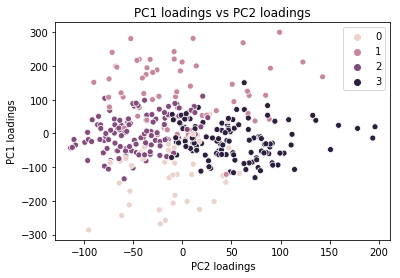

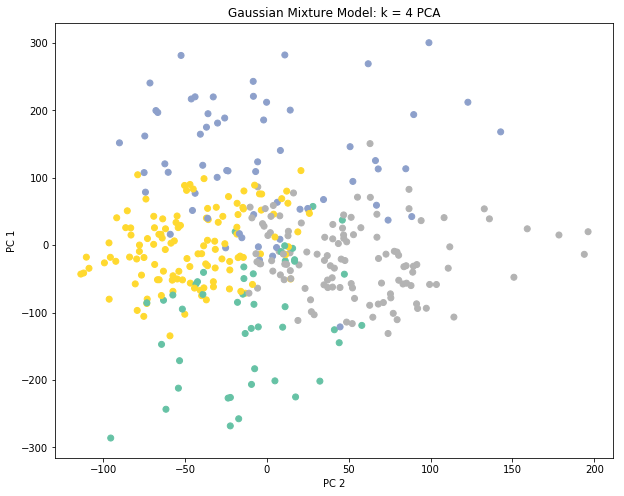

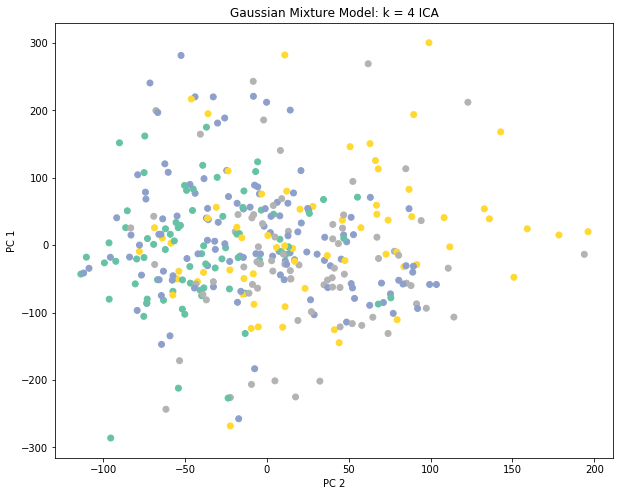

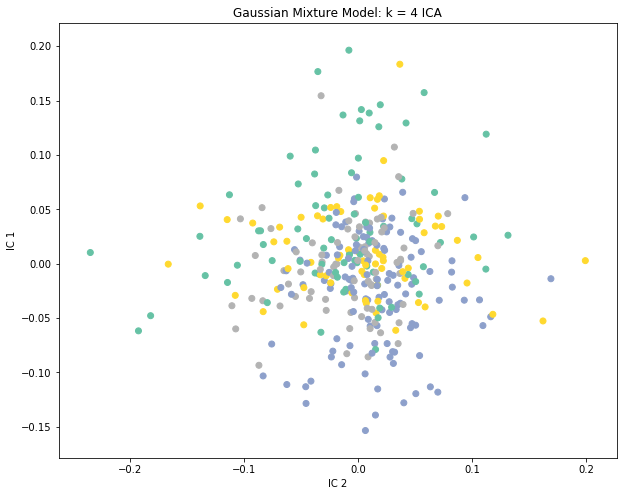

In [65]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = gmm_clustered_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Gaussian Mixture Model: k = 4 PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Gaussian Mixture Model: k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=gmm_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('Gaussian Mixture Model: k = 4 ICA')
plt.show()

#plt.figure(figsize=(10, 8))
#plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=gmm_clustered_noreduction, cmap='Set2')  # plot points with cluster dependent colors
#plt.xlabel('PC 2')
#plt.ylabel('PC 1')
#plt.title('Gaussian Mixture Model: k = 4 All Samples')
#plt.show()

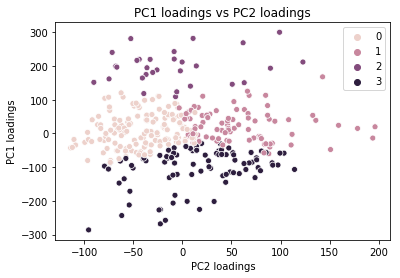

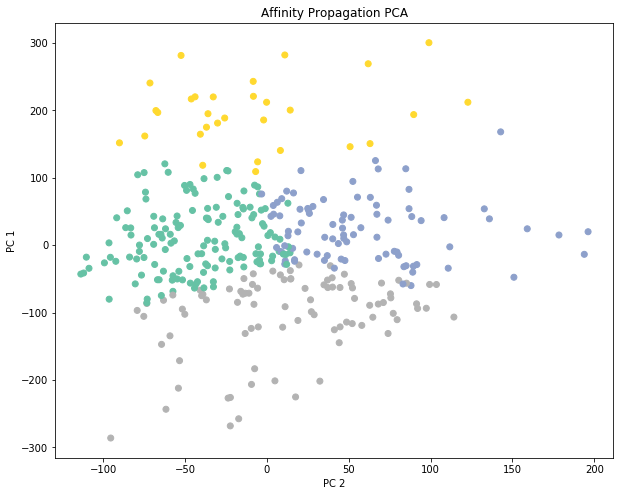

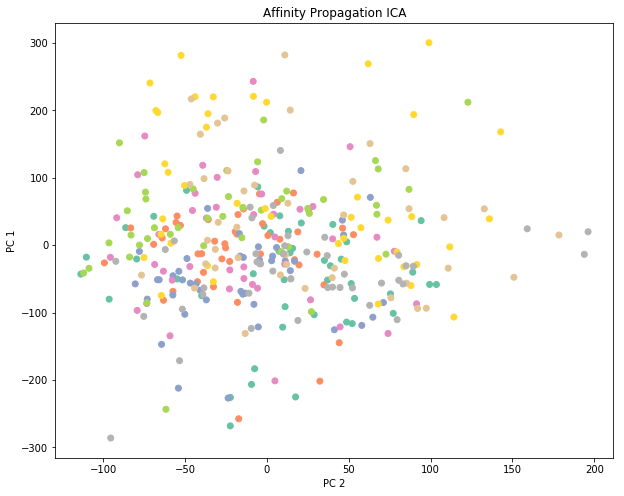

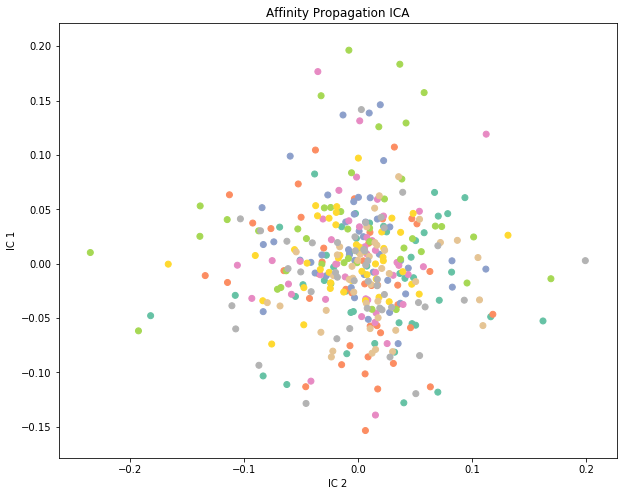

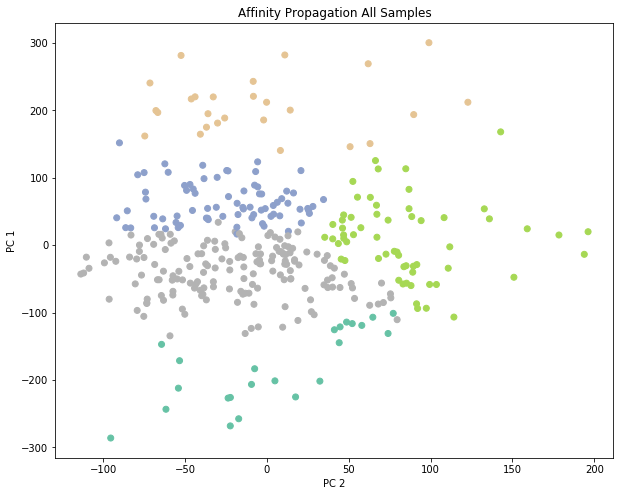

In [66]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = ap_clustered_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation ICA')
plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=ap_clustered_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('Affinity Propagation ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=ap_clustered_noreduction, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('Affinity Propagation All Samples')
plt.show()

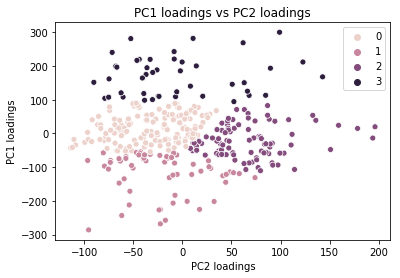

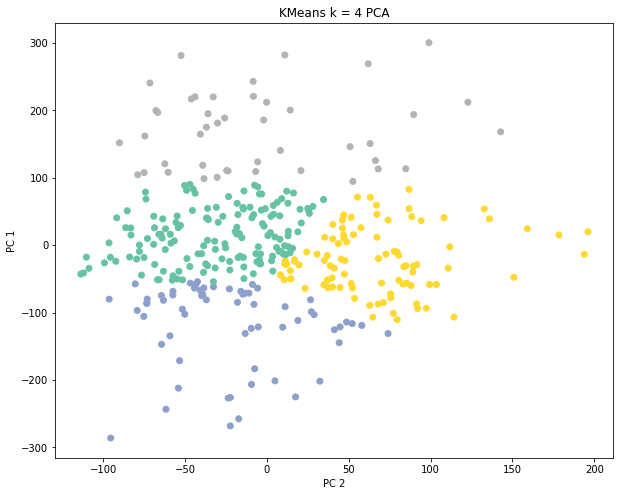

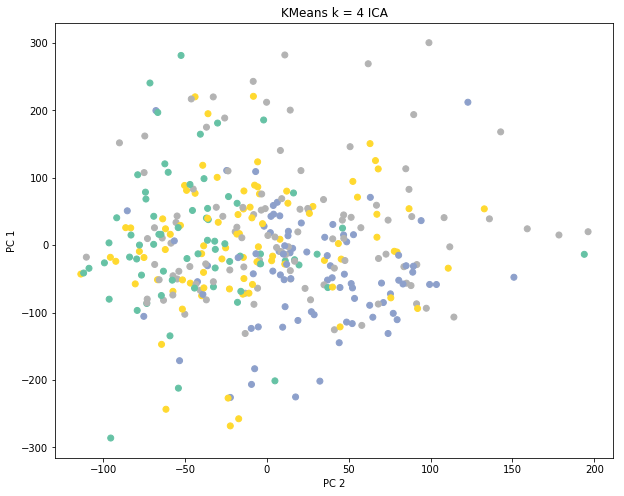

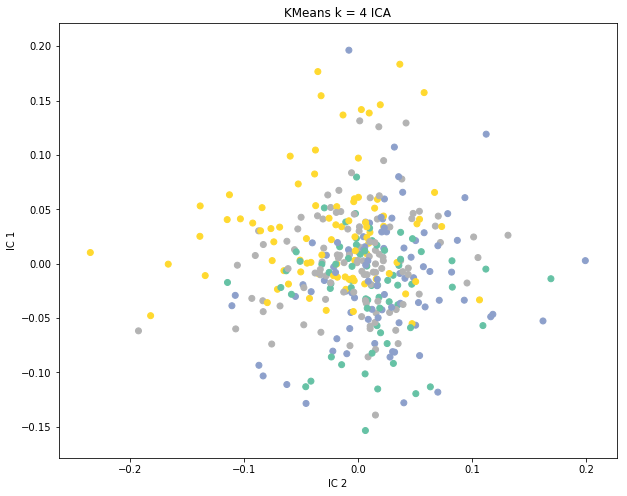

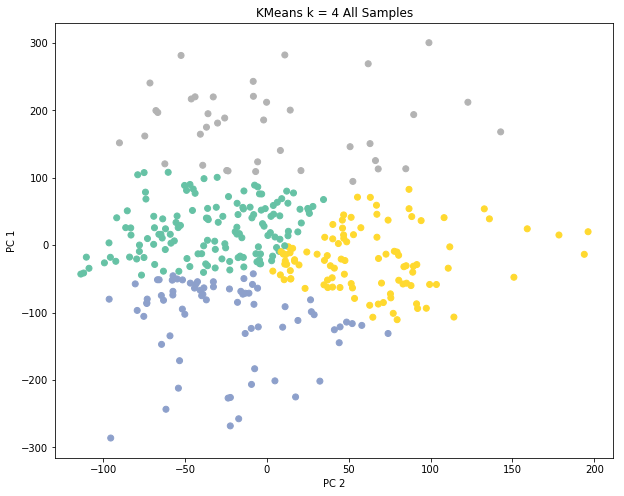

In [67]:
fig, ax = plt.subplots()
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], hue = kmeans_pca)
ax.set_xlabel('PC2 loadings')
ax.set_ylabel('PC1 loadings')
ax.set_title('PC1 loadings vs PC2 loadings')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_pca, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 PCA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(ica_samples[:, 1], ica_samples[:, 0], c=kmeans_ica, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('IC 2')
plt.ylabel('IC 1')
plt.title('KMeans k = 4 ICA')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=kmeans_noreduction, cmap='Set2')  # plot points with cluster dependent colors
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('KMeans k = 4 All Samples')
plt.show()

In [68]:
metadata = pd.read_csv('./EyeGEx_meta_combined_inferior_retina_summary_deidentified.txt',names=['r_id','sample_id', 'os_od',
'age', 'sex', 'mgs_level' ,'rin', 'postmortem_interval_hrs'], delim_whitespace=True, index_col = 0)
metadata = metadata.iloc[1:,:]
metadata = metadata.filter(items=cells, axis=0)
metadata.columns=['sample_id', 'os_od', 'age', 'sex', 'MGS Level' ,'rin', 'postmortem_interval_hrs']
metadata

,sample_id,os_od,age,sex,MGS Level,rin,postmortem_interval_hrs
r_id,,,,,,,
100_2,100,OS,70,F,2,7.4,22.75
101_3,101,OS,94,M,3,7.8,19.48
102_2,102,OD,66,F,2,7.7,22.77
103_3,103,OS,93,F,3,6.7,9.82
104_2,104,OD,80,F,2,7,10.15
105_2,105,OD,80,M,2,7.4,12.5
106_4,106,OS,90,F,4,7.8,15.92
107_4,107,OD,107,F,4,6.4,22.67
11_4,11,OD,88,M,4,7.5,25.63


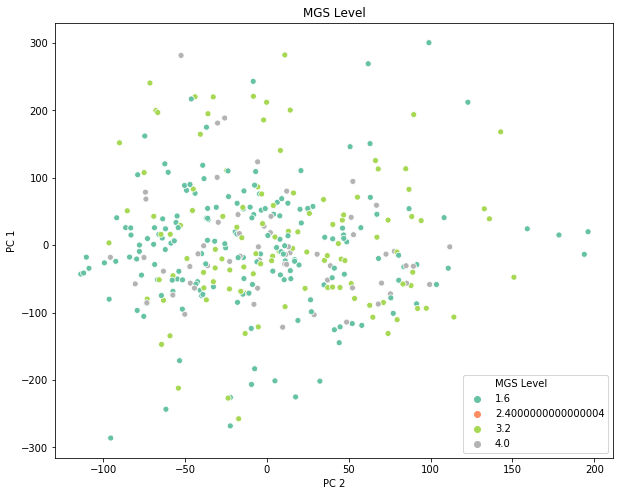

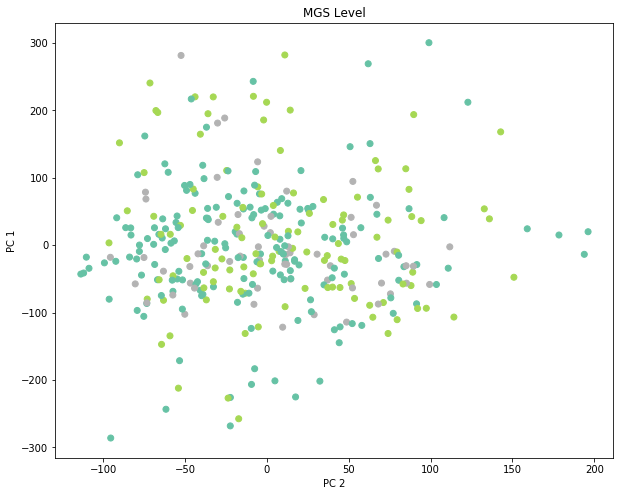

In [69]:
#fig, ax = plt.subplots()
plt.figure(figsize=(10, 8))
sns.scatterplot(x = pca_samples[:, 1], y = pca_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
plt.scatter(pca_samples[:, 1], pca_samples[:, 0], c=metadata['MGS Level'], cmap='Set2')  # plot points with cluster dependent colors
#plt.legend() #metadata['mgs_level'])
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')
plt.show()

Text(0.5,1,'MGS Level')

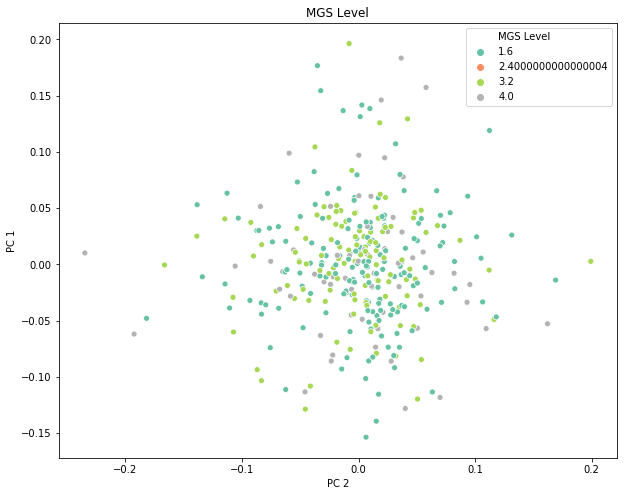

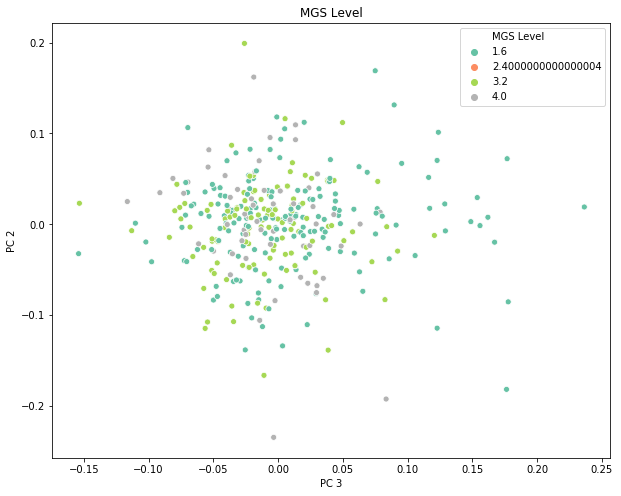

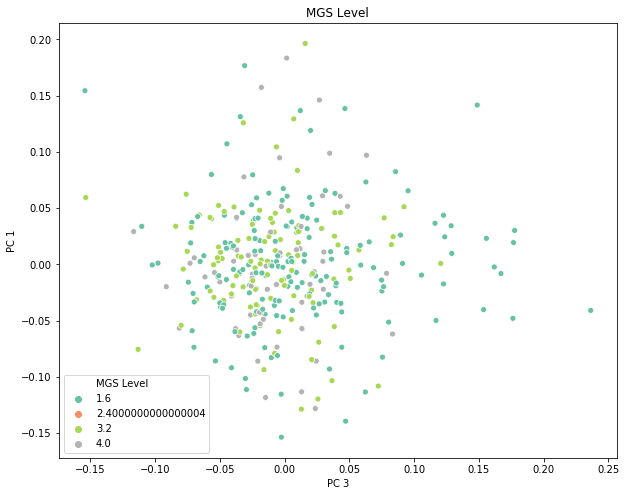

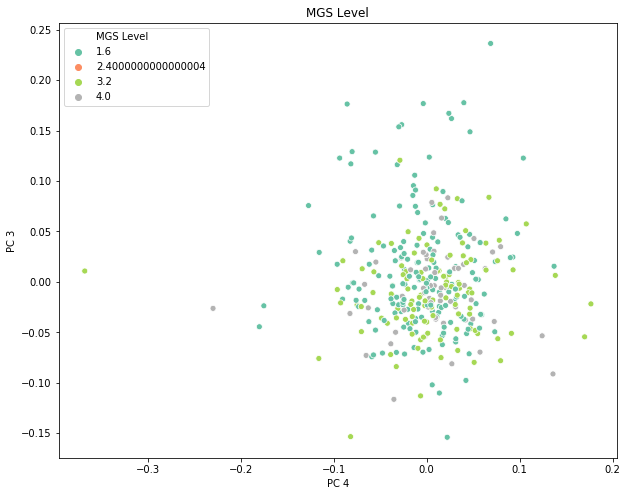

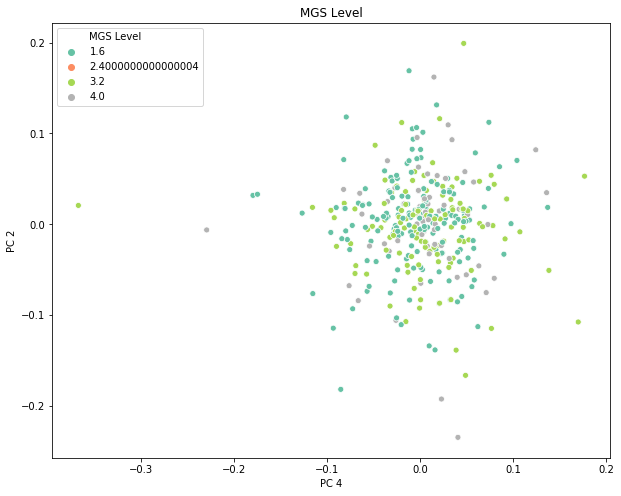

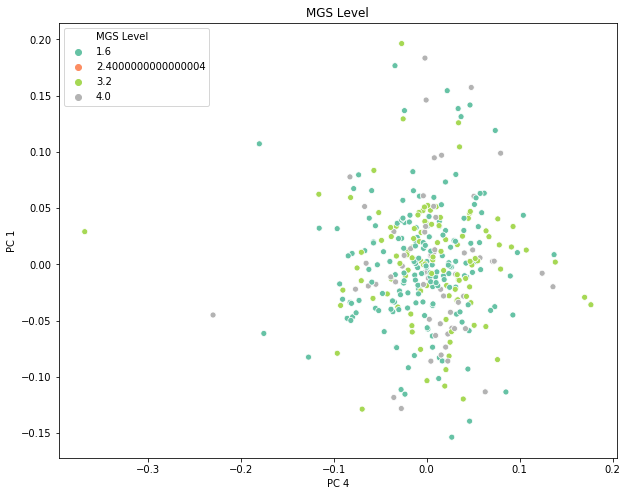

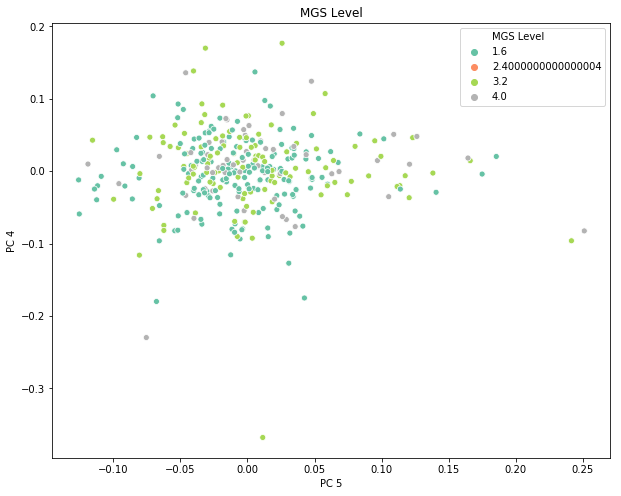

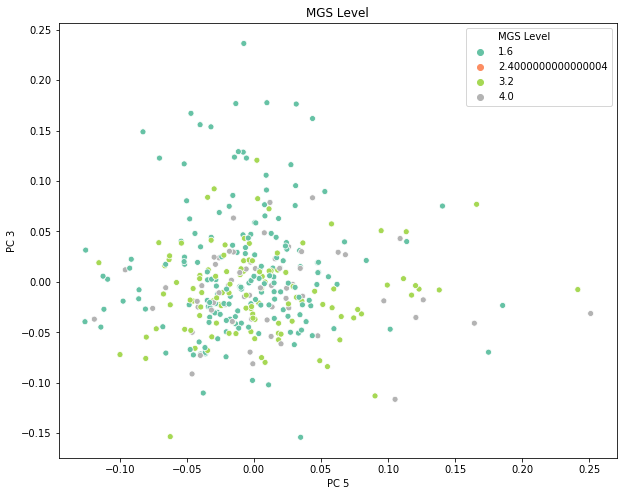

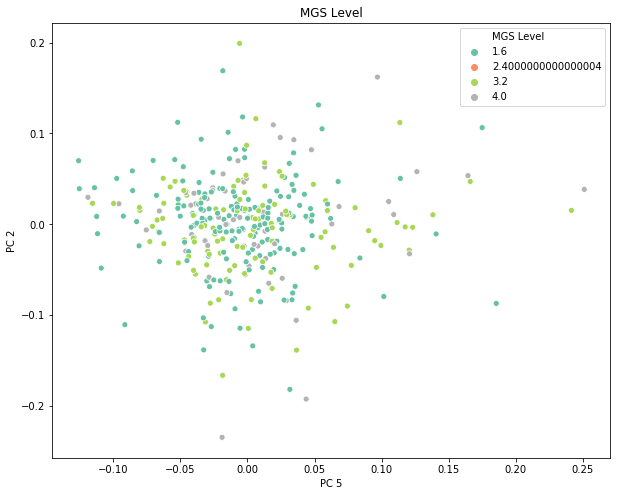

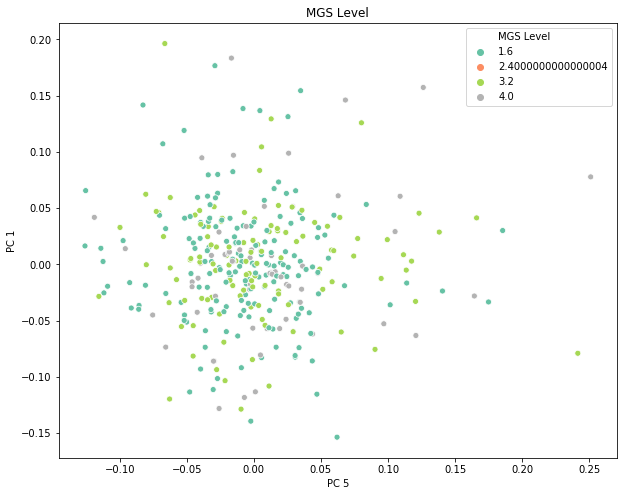

In [70]:


plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 1], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 2')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 2], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 3')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 2], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 3')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 2], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 3')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 3], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 4')
plt.ylabel('PC 1')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 3], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 4')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 2], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 3')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 1], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 2')
plt.title('MGS Level')

plt.figure(figsize=(10, 8))
sns.scatterplot(x = ica_samples[:, 4], y = ica_samples[:, 0], palette = 'Set2', hue = metadata['MGS Level'].astype(np.float), cmap='Set2')
plt.xlabel('PC 5')
plt.ylabel('PC 1')
plt.title('MGS Level')